- aula 2 (Definindo intervalos, calculando e plotando médias móveis) - https://youtu.be/BBomKv3NFNc

In [ ]:
!pip install yfinance --upgrade

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

In [ ]:
def papel(acao, inicio, fim):
  return web.get_data_yahoo(acao, start=inicio, end=fim)

In [ ]:
def verpapel(papel):
  papel['Close'].plot(figsize=(22, 8), label='Ação')
  papel['Close'].rolling(30).mean().plot(label='MM30')#media movel
  #papel['Close'].rolling(120).mean().plot(label='MM120')#media movel
  plt.legend()

## ITAU

In [ ]:
ibov = papel('^BVSP',  '2020-01-01', '2023-01-23')

[*********************100%***********************]  1 of 1 completed


In [ ]:
itau = papel('ITSA4.SA', '2020-01-01', '2023-01-23')
#itau[(itau.index.year >= 2022) & (itau.index.year <= 2023)]

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


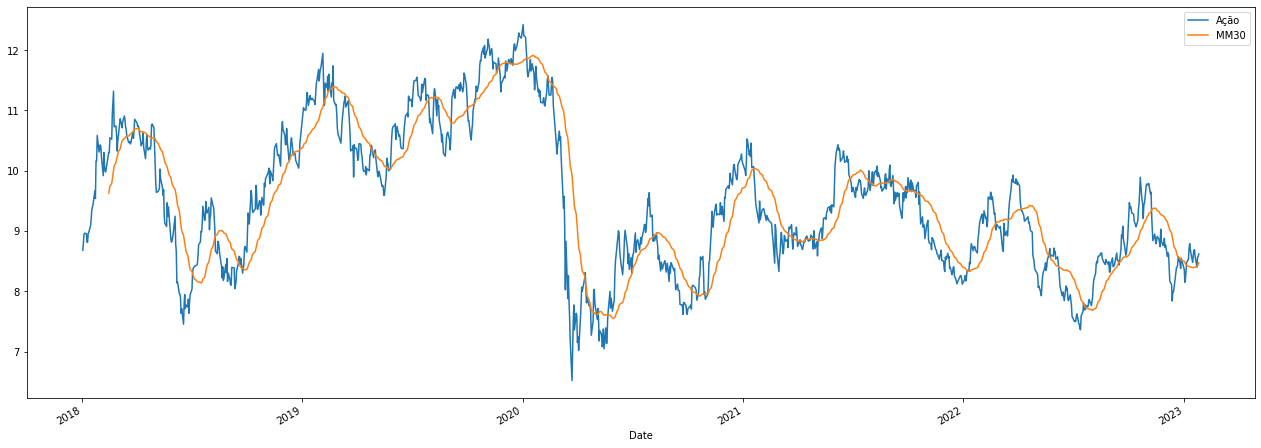

In [ ]:
verpapel(papel('ITSA4.SA', '2018-01-01', '2023-01-27'))

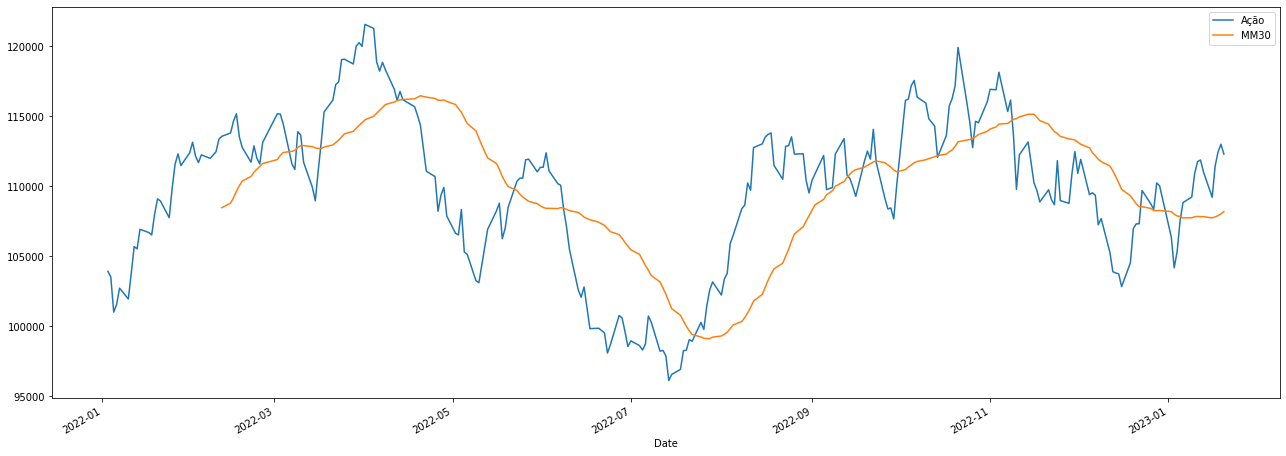

In [ ]:
ibov_f = ibov[(ibov.index.year >= 2022) & (ibov.index.year <= 2023)]
verpapel(ibov_f)

[*********************100%***********************]  1 of 1 completed


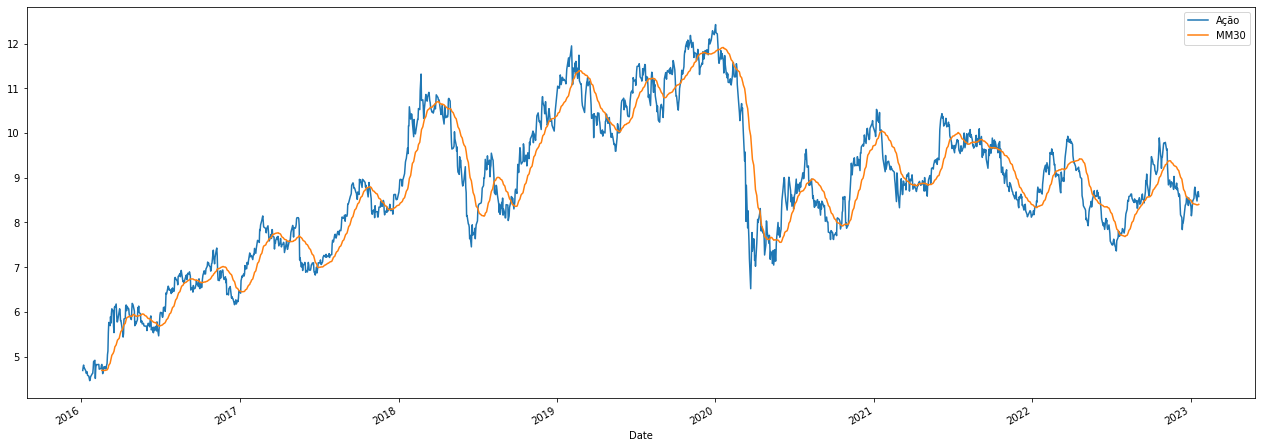

In [ ]:
verpapel(papel('ITSA4.SA', '2016-01-01', '2023-01-23'))

## BOVA11

[*********************100%***********************]  1 of 1 completed


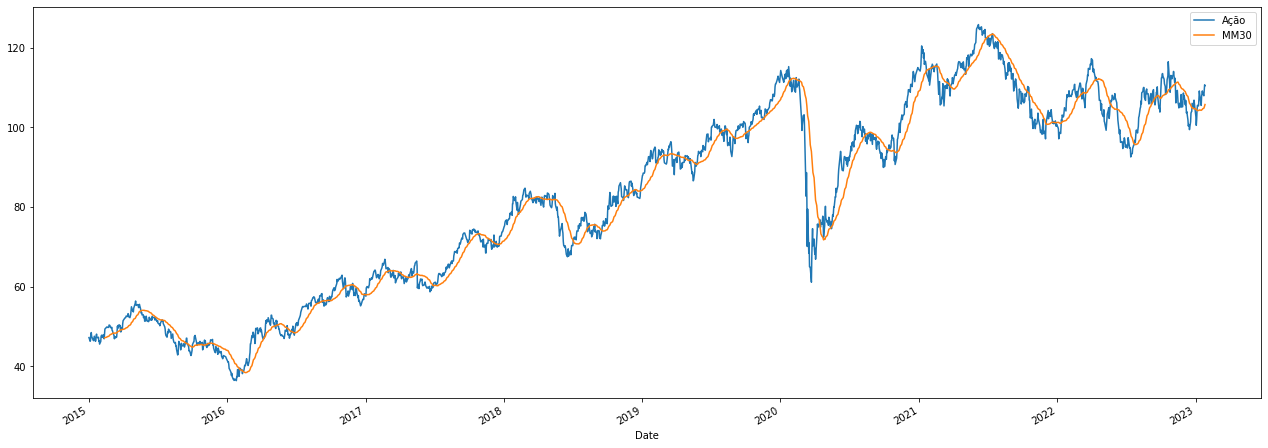

In [ ]:
verpapel(papel('BOVA11.SA', '2015-01-01', '2023-01-27'))

[*********************100%***********************]  1 of 1 completed


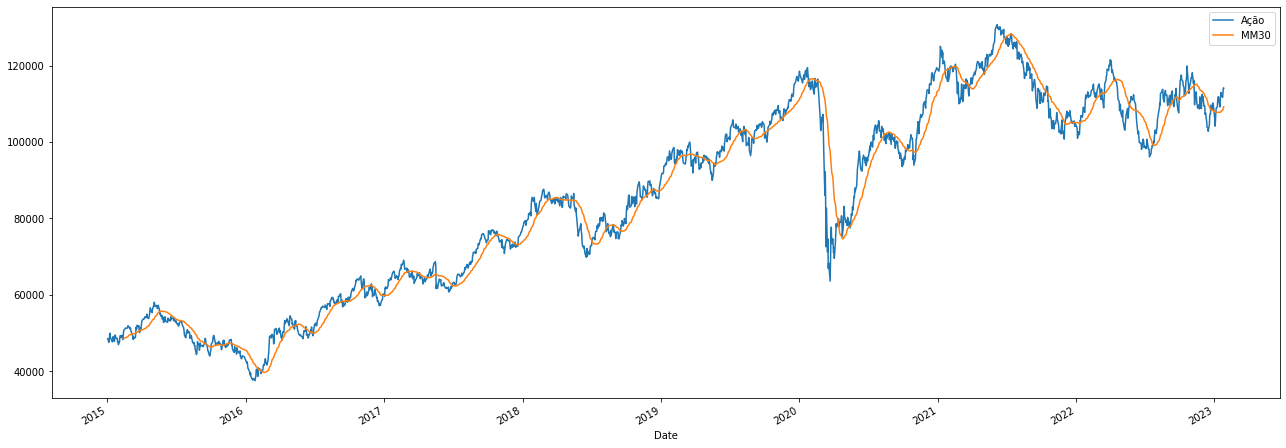

In [ ]:
verpapel(papel('^BVSP', '2015-01-01', '2023-01-27'))

## OUTRAS ANALISES 

In [ ]:
lmt = yf.Ticker('LMT')

In [ ]:
lmt.info

In [ ]:
hist = lmt.history(period="max")
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-23 00:00:00-05:00,479.500000,484.179993,478.359985,483.290009,661600,0.0,0.0
2022-12-27 00:00:00-05:00,485.000000,489.239990,483.500000,485.500000,788800,0.0,0.0
2022-12-28 00:00:00-05:00,486.149994,489.000000,482.899994,483.220001,810300,0.0,0.0
2022-12-29 00:00:00-05:00,484.000000,489.570007,483.299988,487.049988,764000,0.0,0.0
2022-12-30 00:00:00-05:00,488.000000,489.809998,481.239990,486.489990,909500,0.0,0.0


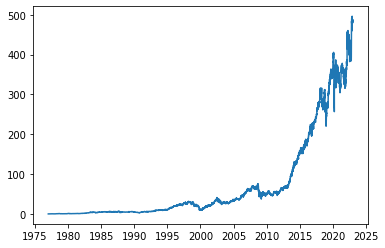

In [ ]:
plt.plot(hist['Close'], label='LMT')

In [ ]:
dividendos = hist['Dividends'].resample('Y').sum()

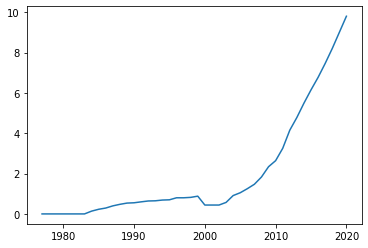

In [ ]:
plt.plot(dividendos.index.year[:-2], dividendos[:-2], label='LMT')

In [ ]:
# Get the stock data
stock_data = web.get_data_yahoo('ITSA4.SA', start='2020-01-01', end='2023-01-20')

# Create a list to store purchase information
purchases = []

# Add purchase information to the list
purchases.append({"date": "2022-01-01", "price": 200, "shares": 100})
purchases.append({"date": "2022-04-01", "price": 150, "shares": 50})

# Get the current stock price
current_price = web.get_data_yahoo('ITSA4.SA', start='2020-01-01', end='2023-01-20')

# Compare the purchase price to the current price
# for purchase in purchases:
#     purchase_date = purchase["date"]
#     purchase_price = purchase["price"]
#     purchase_shares = purchase["shares"]
#     current_price_on_purchase_date = stock_data.loc[purchase_date]["Close"]
#     difference = current_price_on_purchase_date - purchase_price
#     print(f"On {purchase_date}, {purchase_shares} shares of stock were purchased for ${purchase_price}. The current price is ${current_price_on_purchase_date}, making a difference of ${difference}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(purchases)

[{'date': '2022-01-01', 'price': 200, 'shares': 100}, {'date': '2022-04-01', 'price': 150, 'shares': 50}]


In [ ]:
current_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-03:00,12.242424,12.450216,12.181818,12.424242,10.664327,21118944
2020-01-03 00:00:00-03:00,12.294372,12.432900,12.225108,12.242424,10.508261,25204410
2020-01-06 00:00:00-03:00,12.225108,12.303030,12.129870,12.216450,10.485966,23415084
2020-01-07 00:00:00-03:00,12.225108,12.242424,11.965367,12.051948,10.344766,23179810
2020-01-08 00:00:00-03:00,12.077922,12.164502,11.844155,11.870129,10.188704,22390021
...,...,...,...,...,...,...
2023-01-13 00:00:00-03:00,8.660000,8.800000,8.530000,8.630000,8.630000,10766100
2023-01-16 00:00:00-03:00,8.620000,8.620000,8.400000,8.480000,8.480000,15106900
2023-01-17 00:00:00-03:00,8.480000,8.670000,8.460000,8.610000,8.610000,17051000
